# SUPERSTORE SALES ANALYSIS

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

In [66]:
data_frame = pd.read_csv('US_Superstore_data.csv')

In [67]:
print("\nFirst 5 rows:")
data_frame.head()


First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [68]:
print("\nLast 5 rows:")
data_frame.tail()


Last 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,04-05-2017,09-05-2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [69]:
print(f"\nShape of the dataset (rows, columns): {data_frame.shape}")


Shape of the dataset (rows, columns): (9994, 21)


In [70]:
print(f"\nColumns in the dataset: {data_frame.columns.tolist()}")


Columns in the dataset: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [71]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [72]:
# Check for missing values (NaN/null) in each column.
print("\nMissing values per column:")
print(data_frame.isna().sum())


Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [73]:
print(f"Number of entirely duplicate rows: {data_frame.duplicated().sum()}")

Number of entirely duplicate rows: 0


In [74]:
print("\nDescriptive Statistics for Numerical Columns (mean, std, min, max, quartiles):")
print(data_frame.describe().round(2))


Descriptive Statistics for Numerical Columns (mean, std, min, max, quartiles):
        Row ID  Postal Code     Sales  Quantity  Discount   Profit
count  9994.00      9994.00   9994.00   9994.00   9994.00  9994.00
mean   4997.50     55190.38    229.86      3.79      0.16    28.66
std    2885.16     32063.69    623.25      2.23      0.21   234.26
min       1.00      1040.00      0.44      1.00      0.00 -6599.98
25%    2499.25     23223.00     17.28      2.00      0.00     1.73
50%    4997.50     56430.50     54.49      3.00      0.20     8.67
75%    7495.75     90008.00    209.94      5.00      0.20    29.36
max    9994.00     99301.00  22638.48     14.00      0.80  8399.98


#  Data Cleaning and Preprocessing

In [75]:
# Convert 'Order Date' and 'Ship Date' columns from string/object type to datetime objects.
data_frame['Order Date'] = pd.to_datetime(data_frame['Order Date'], format='%d-%m-%Y')
data_frame['Ship Date'] = pd.to_datetime(data_frame['Ship Date'], format='%d-%m-%Y')
print("Converted 'Order Date' and 'Ship Date' to datetime format for time-series analysis.")

# Extract 'month_year' from 'Order Date'.
data_frame['month_year'] = data_frame['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
print("Created 'month_year' column for time-based aggregation.")

# Create a binary target variable 'is_profitable' for the classification task.
data_frame['is_profitable'] = (data_frame['Profit'] > 0).astype(int)
print("Created 'is_profitable' column (1 for profitable, 0 for not) for classification task.")


Converted 'Order Date' and 'Ship Date' to datetime format for time-series analysis.
Created 'month_year' column for time-based aggregation.
Created 'is_profitable' column (1 for profitable, 0 for not) for classification task.



--- 3. Exploratory Data Analysis (EDA) with Visualizations ---


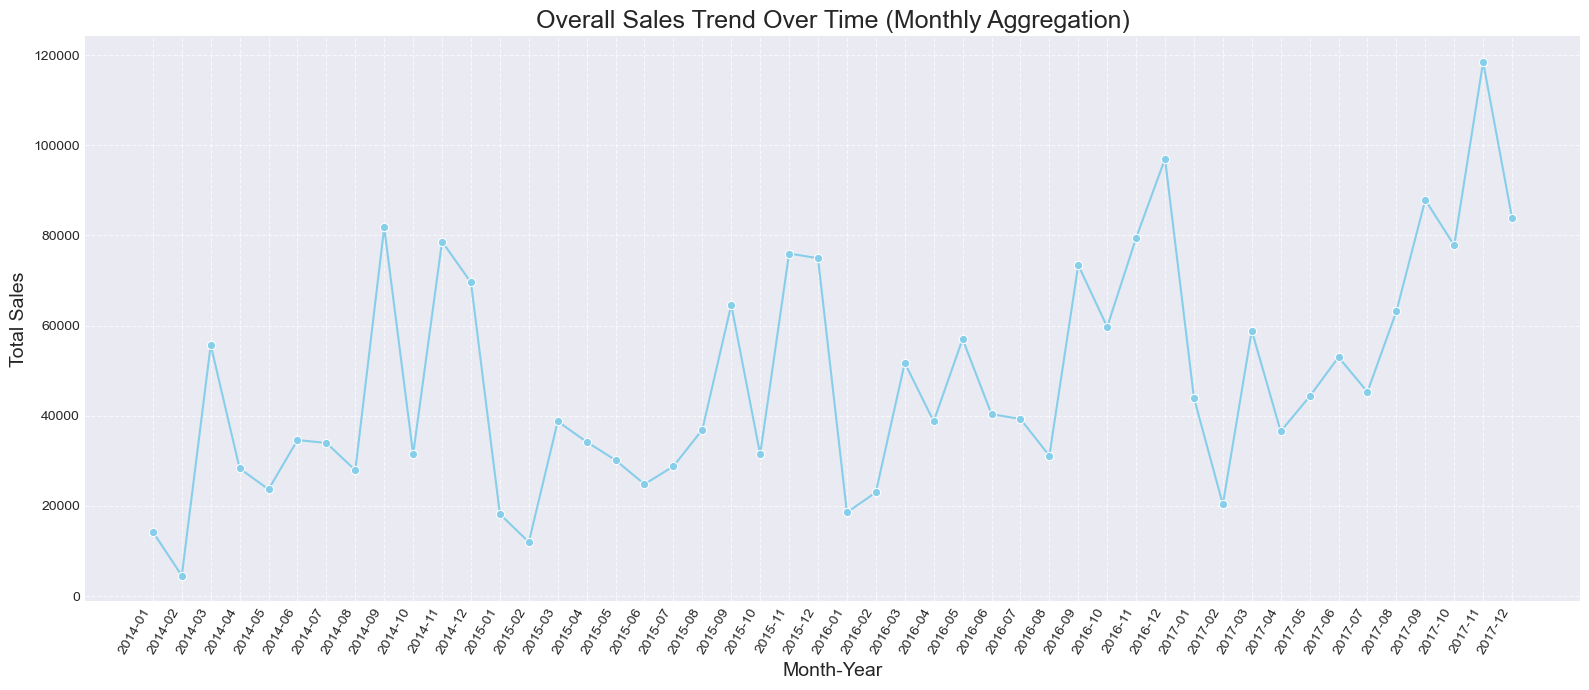

In [76]:
# --- 3. Exploratory Data Analysis (EDA) with Visualizations ---
print("\n--- 3. Exploratory Data Analysis (EDA) with Visualizations ---")

# Overall Sales Trend Over Time
# This line plot shows how total sales have evolved month by month, revealing seasonality or growth.
sales_trend = data_frame.groupby('month_year')['Sales'].sum().reset_index()
plt.figure(figsize=(16, 7))
sns.lineplot(data=sales_trend, x='month_year', y='Sales', marker='o', color='skyblue')
plt.title('Overall Sales Trend Over Time (Monthly Aggregation)', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


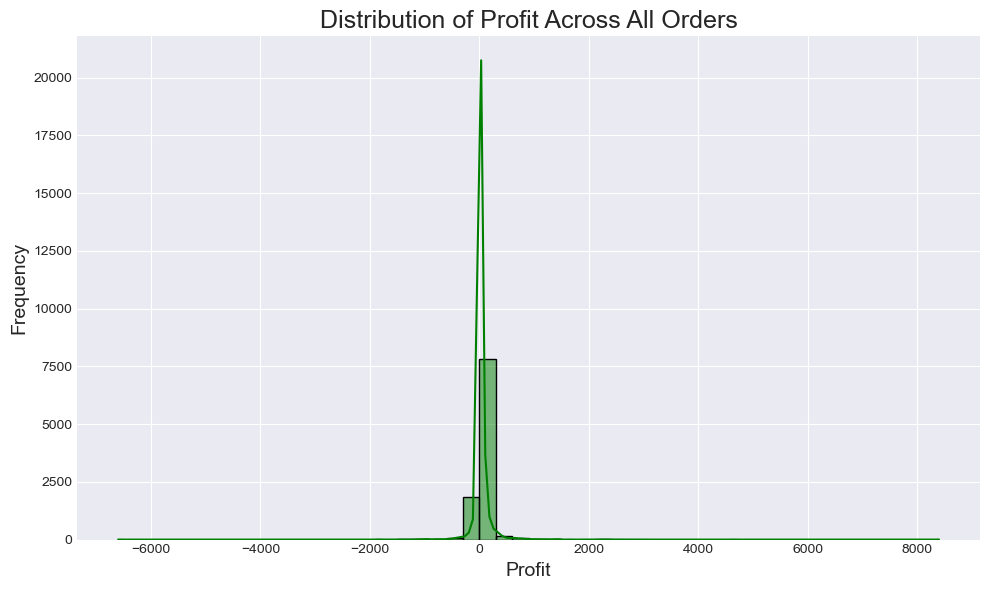

In [77]:
# A histogram helps visualize the spread of profit values, showing common profit ranges and outliers.
plt.figure(figsize=(10, 6))
sns.histplot(data_frame['Profit'], bins=50, kde=True, color='green')
plt.title('Distribution of Profit Across All Orders', fontsize=18)
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Sales and Profit by Category


Visualizing Sales and Profit by Product Category...


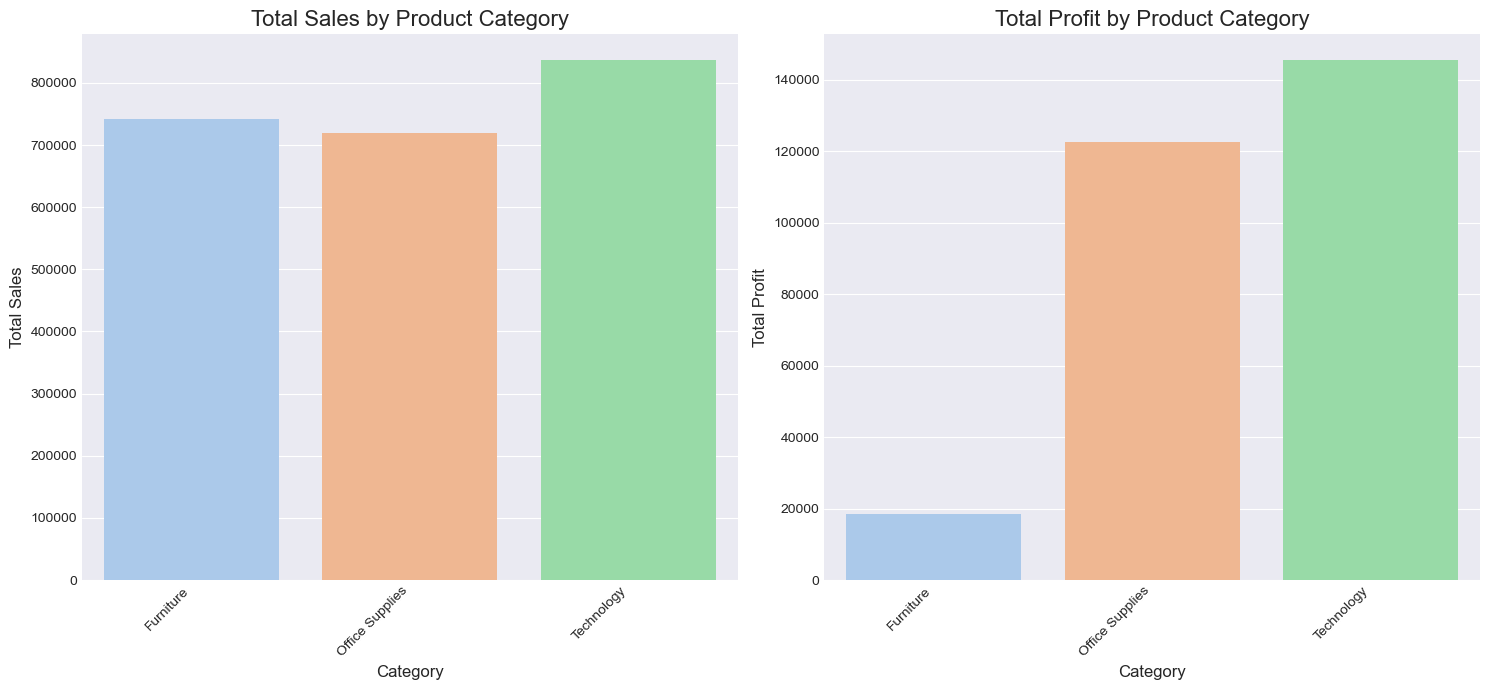

In [78]:
print("\nVisualizing Sales and Profit by Product Category...")
category_analysis = data_frame.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1) 
sns.barplot(data=category_analysis, x='Category', y='Sales', palette='pastel')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(1, 2, 2) 
sns.barplot(data=category_analysis, x='Category', y='Profit', palette='pastel')
plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


# Sales and Profit by Region

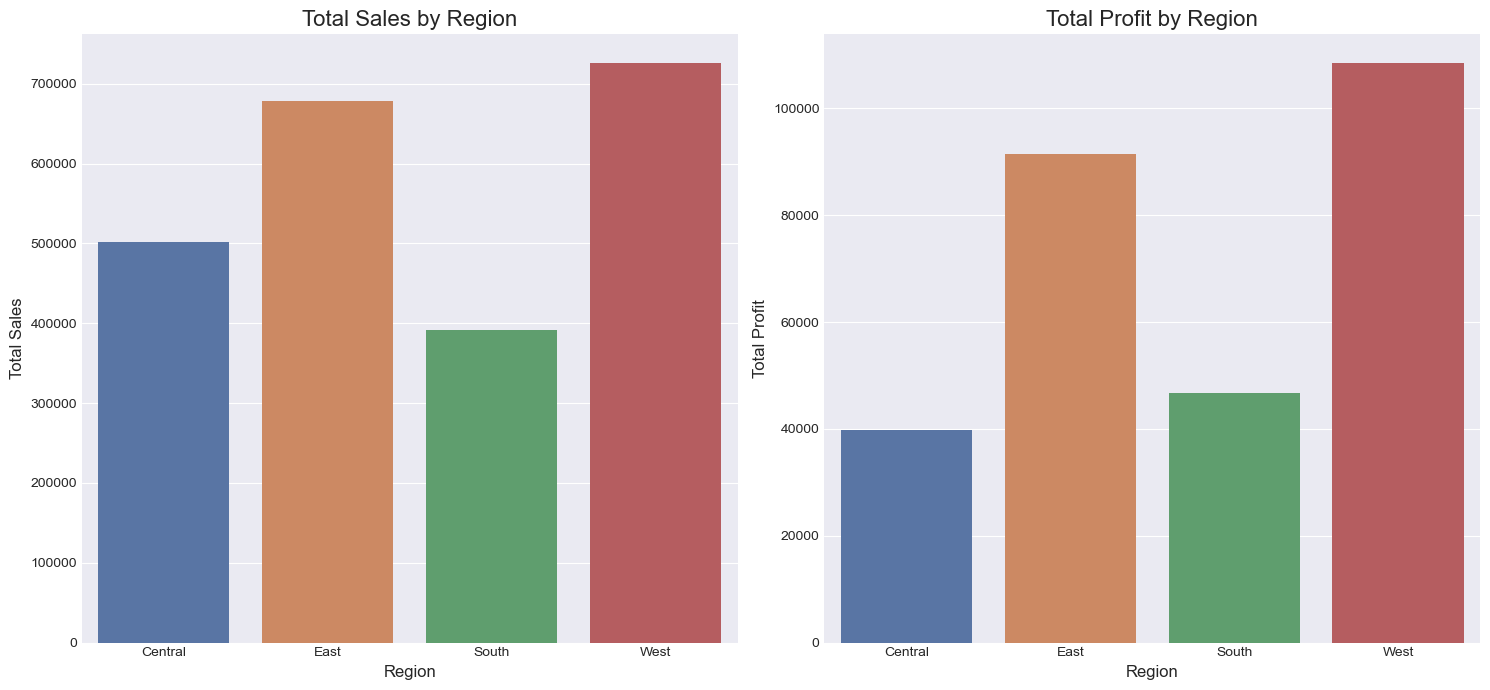

In [79]:
region_analysis = data_frame.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.barplot(data=region_analysis, x='Region', y='Sales', palette='deep')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(data=region_analysis, x='Region', y='Profit', palette='deep')
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


# Relationship between Discount and Profit

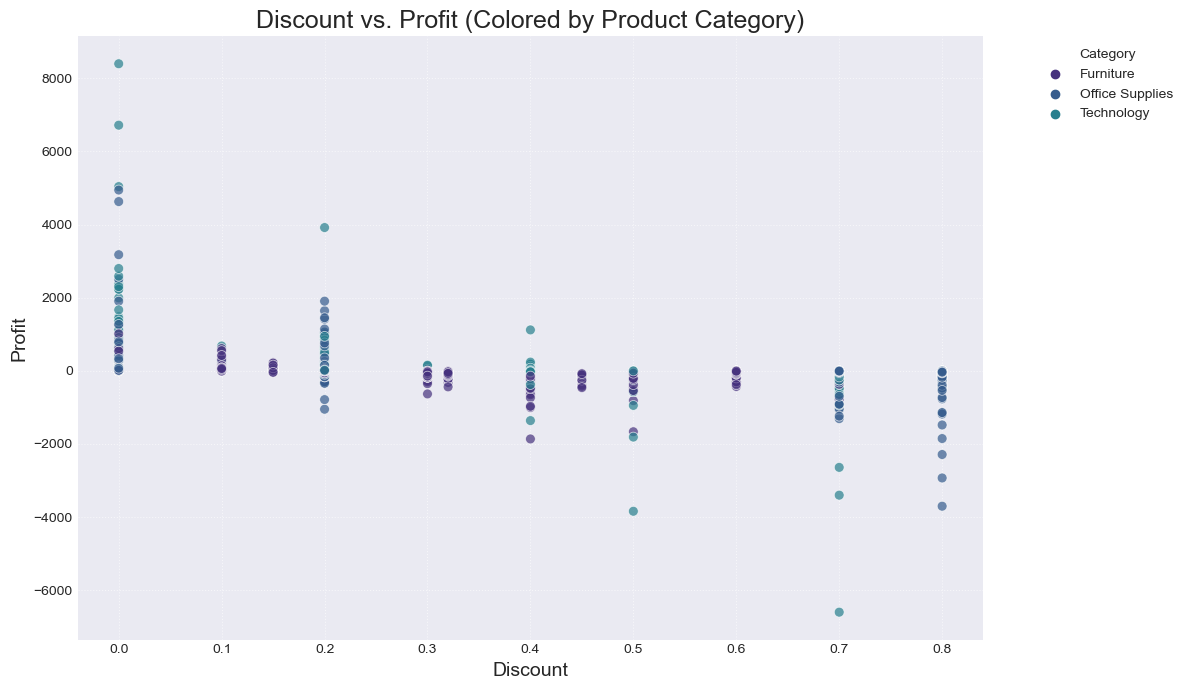

In [80]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=data_frame, x='Discount', y='Profit', hue='Category', alpha=0.7, s=50) 
plt.title('Discount vs. Profit (Colored by Product Category)', fontsize=18)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout() 
plt.show()

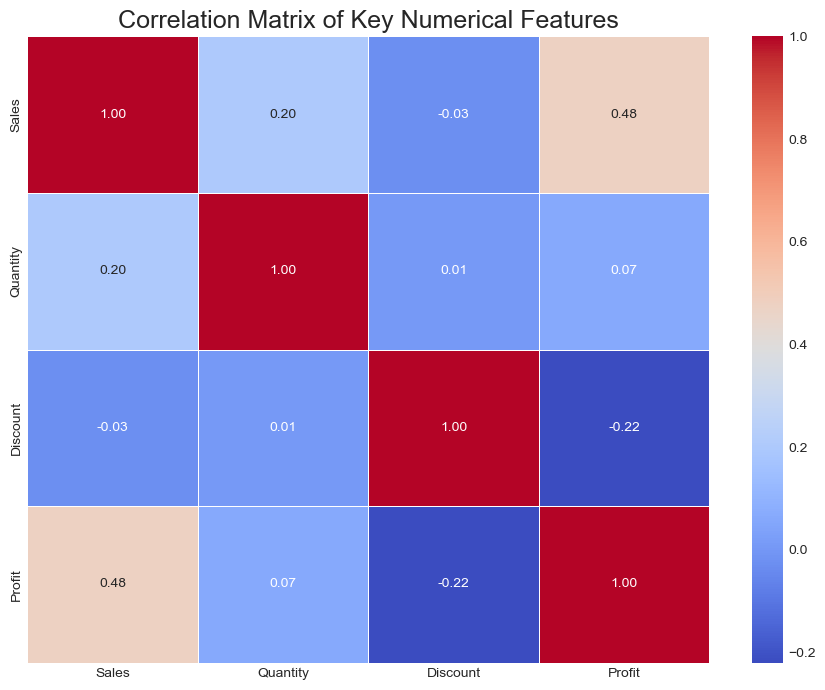

In [81]:
# This heatmap shows the correlation coefficients between numerical variables
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(9, 7))
sns.heatmap(data_frame[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Machine Learning: Regression Model (Predicting Profit) 

In [82]:
# Define features (X) and target (y) for the regression task.
# We select relevant columns that could influence profit.
features_reg = ['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category', 'Region', 'Ship Mode', 'Segment']
target_reg = 'Profit'

X_reg = data_frame[features_reg].copy() # Create a copy to avoid modifying the original DataFrame
y_reg = data_frame[target_reg]

X_reg = pd.get_dummies(X_reg, columns=['Category', 'Sub-Category', 'Region', 'Ship Mode', 'Segment'], drop_first=True)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print(f"Regression data split: Training samples={len(X_train_reg)}, Testing samples={len(X_test_reg)}")

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)


Regression data split: Training samples=7995, Testing samples=1999


LinearRegression()

In [83]:
y_pred_reg = reg_model.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE) for Profit Prediction: {mae:.2f}")


Mean Absolute Error (MAE) for Profit Prediction: 67.80


# Visualize Actual vs. Predicted Profits.

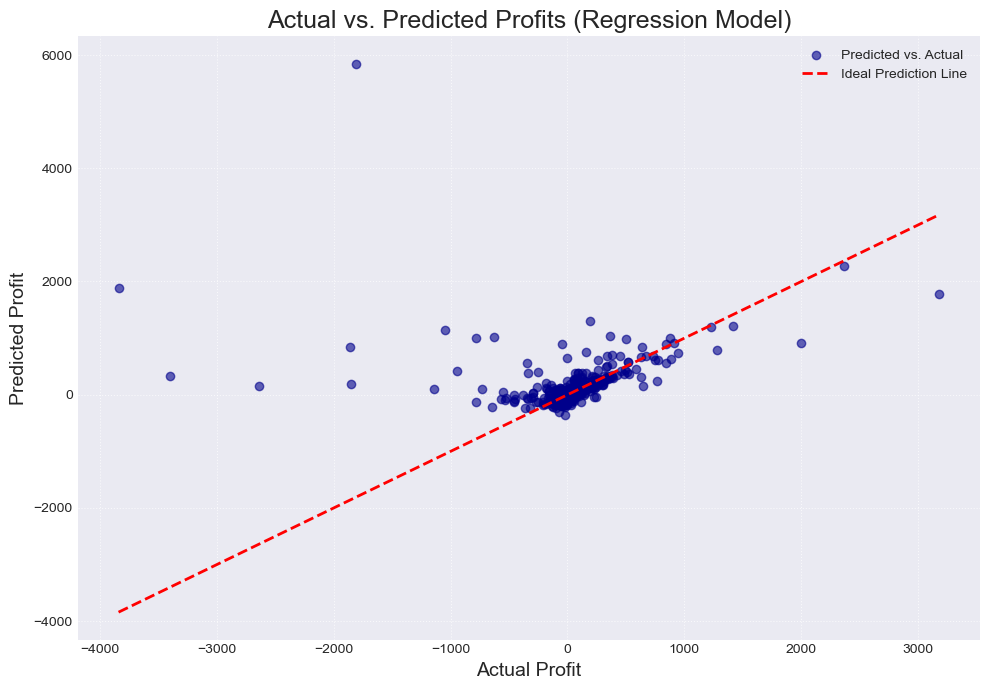

In [84]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='darkblue', label='Predicted vs. Actual')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.title('Actual vs. Predicted Profits (Regression Model)', fontsize=18)
plt.xlabel('Actual Profit', fontsize=14)
plt.ylabel('Predicted Profit', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


#  Machine Learning: Classification Model (Predicting Profitability) 


In [85]:
features_cls = ['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category', 'Region', 'Ship Mode', 'Segment']
target_cls = 'is_profitable'

X_cls = data_frame[features_cls].copy()
y_cls = data_frame[target_cls]

X_cls = pd.get_dummies(X_cls, columns=['Category', 'Sub-Category', 'Region', 'Ship Mode', 'Segment'], drop_first=True)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
print(f"Classification data split: Training samples={len(X_train_cls)}, Testing samples={len(X_test_cls)}")

cls_model = LogisticRegression(max_iter=1000, solver='liblinear')
cls_model.fit(X_train_cls, y_train_cls)


Classification data split: Training samples=7995, Testing samples=1999


LogisticRegression(max_iter=1000, solver='liblinear')

In [86]:
y_pred_cls = cls_model.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy Score for Profitability Prediction: {accuracy:.2f}")
print("\nClassification Report (Precision, Recall, F1-score for each class):")
print(classification_report(y_test_cls, y_pred_cls))


Accuracy Score for Profitability Prediction: 0.94

Classification Report (Precision, Recall, F1-score for each class):
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       377
           1       0.95      0.98      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.92      0.88      0.90      1999
weighted avg       0.94      0.94      0.94      1999



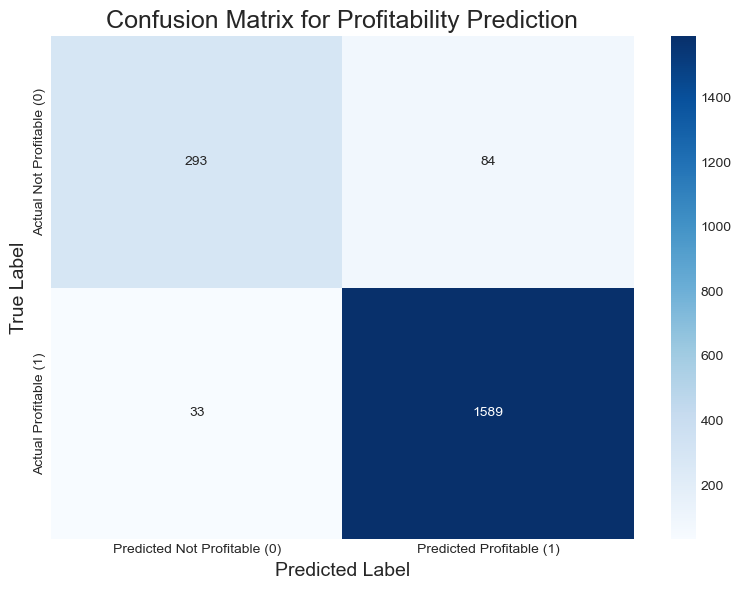

In [87]:
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Profitable (0)', 'Predicted Profitable (1)'],
            yticklabels=['Actual Not Profitable (0)', 'Actual Profitable (1)'])
plt.title('Confusion Matrix for Profitability Prediction', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Decision Tree Model

Decision Tree Accuracy: 0.935967983991996

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       377
           1       0.96      0.96      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.90      0.89      0.89      1999
weighted avg       0.94      0.94      0.94      1999



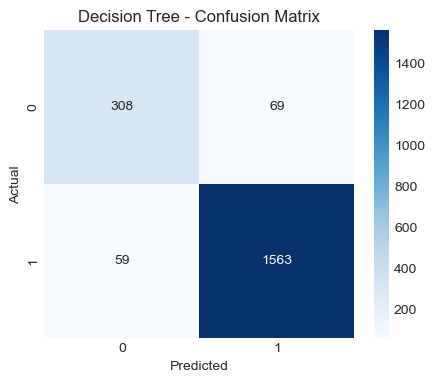

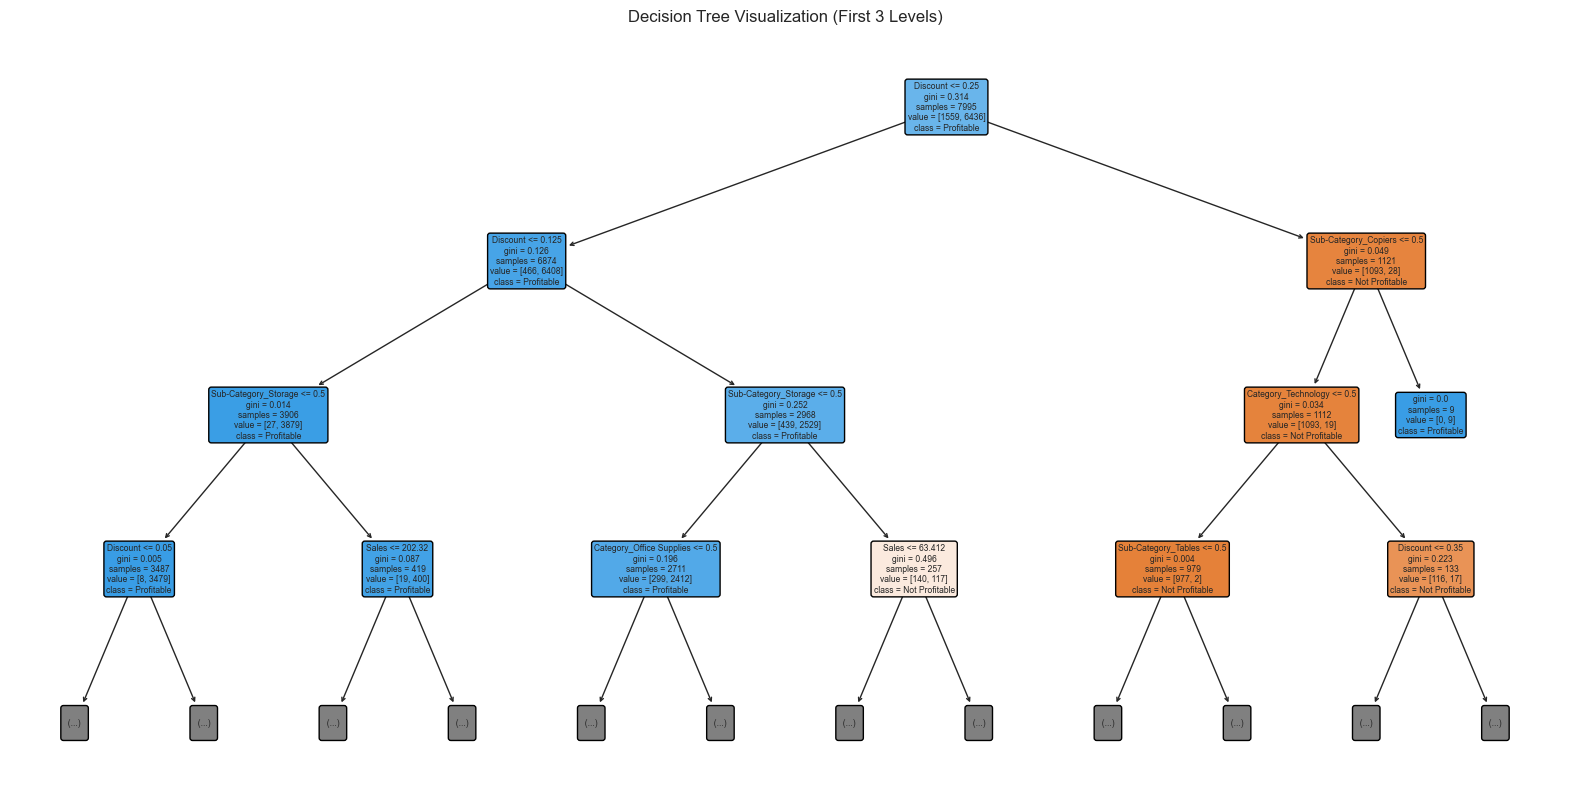

In [91]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_cls, y_train_cls)
y_pred_tree = tree_model.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_tree)
print("Decision Tree Accuracy:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test_cls, y_pred_tree))

cm = confusion_matrix(y_test_cls, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X_cls.columns.tolist(),
          class_names=['Not Profitable', 'Profitable'],
          filled=True,
          rounded=True,
          max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()


In [90]:
print("\n PROJECT COMEPLTED! THANK YOU ")


 PROJECT COMEPLTED! THANK YOU 
